# State transition learning is disrupted in anxiety and compulsivity

### The data includes 5 datapoints per subject, which collapses across performance in 5 conditions. In each condition, a 1 denotes that a subject chose optimally, and 0 otherwise. This leads to a maximum score of 5 and minimum of 0.


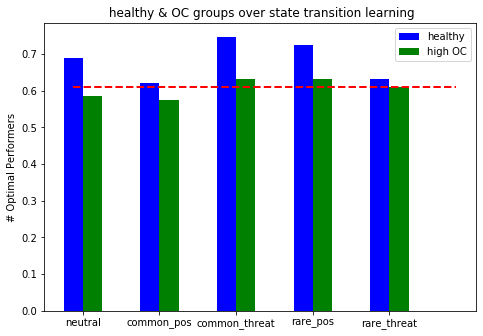

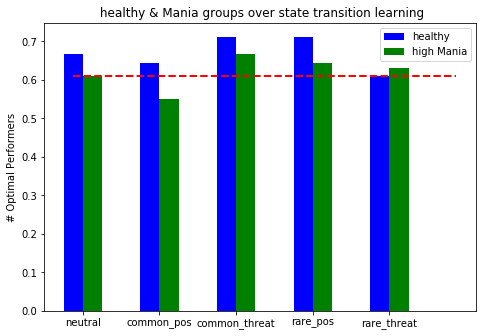

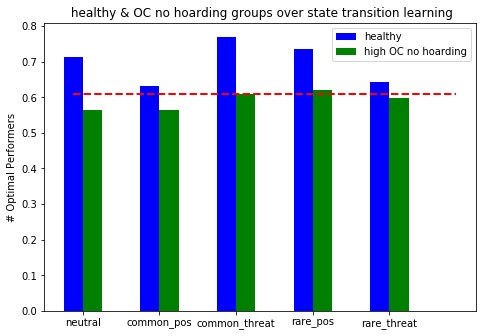

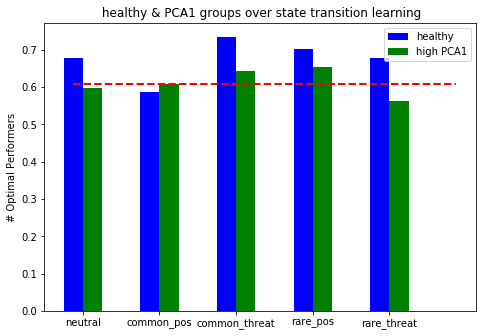

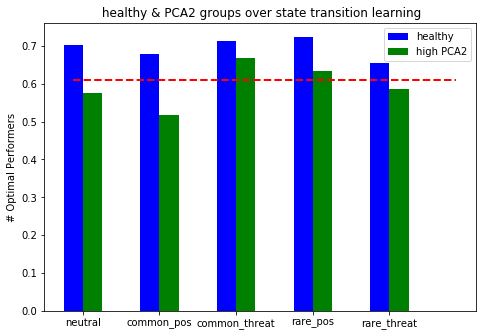

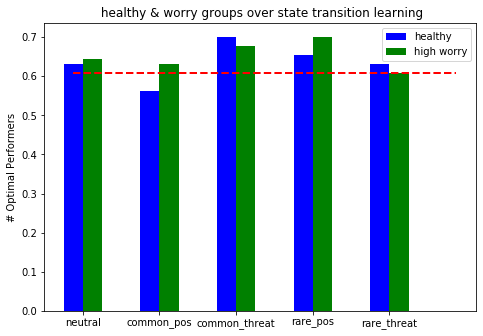

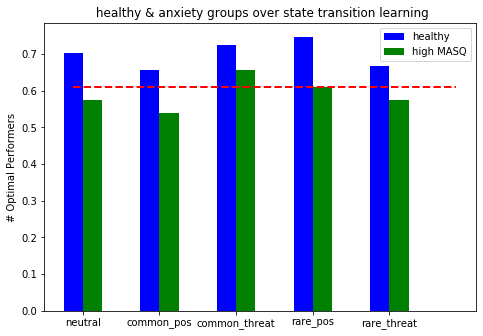

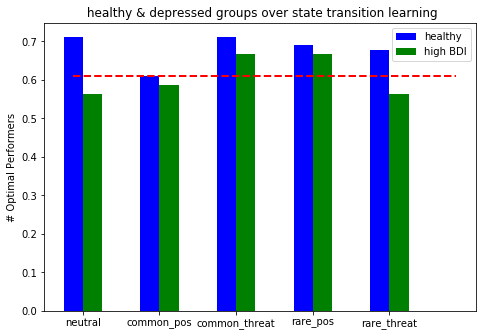

spearman correlations b/t disorder and choice behavior
corr ocd and choice:-0.1537557787798297, pval:0.04280367443128076
corr oc without hoarding and choice:-0.16449374309199458, pval:0.030084299665209792
corr BDI and choice:-0.0814366376042753, pval:0.285405184281163
corr masq and choice:-0.08336541973413787, pval:0.2741110576884965
[-0.2  0.8  1.8  2.8  3.8]
[0.04879747731496574, 0.051998145590111004, 0.04537158185250777, 0.04755382188278446, 0.051642395833086094, 0.05348368965287098, 0.05348368965287098, 0.05261492008272498, 0.0523221247095386, 0.05287704973221805]


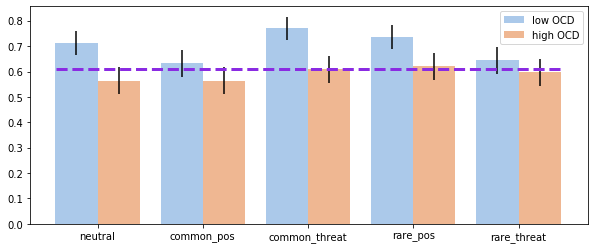

[-0.2  0.8  1.8  2.8  3.8]
[0.049360904959780114, 0.05125421389342356, 0.04819560289115227, 0.04687049503854673, 0.05083285677753489, 0.053311068364552607, 0.053741581963657734, 0.05125421389342356, 0.05261492008272498, 0.053311068364552607]


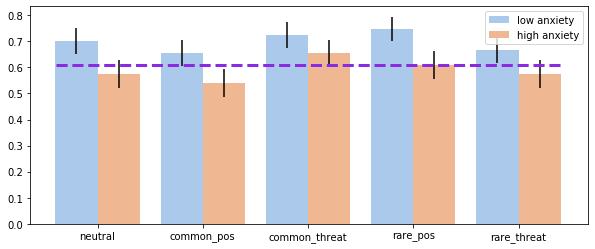

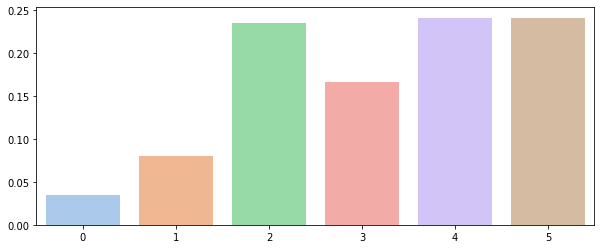

one same t test tval:6.694037753980441, pval:2.9091408199556967e-10


In [2]:
import numpy as np
from scipy.stats import ttest_ind as tt
from scipy.stats import spearmanr as corrs
from sklearn.linear_model import LogisticRegression as lorr
import seaborn as sns
import matplotlib.pyplot as plt
from bayesian_bootstrap.bootstrap import mean, highest_density_interval
import pandas as pd
from scipy.stats import mode, ttest_rel
from scipy.stats import mode, ttest_1samp as t1
import numpy


choice_data =np.load('choice_data_binned_2.npy')
masq_data=np.load('anxious_arousal_ordered_hf.npy')
ocd_data=np.load('oci_r_scores.npy')
oc_without_hoarding=np.load('compulsivity_ordered_hf.npy')
worry_data=np.load('worry_ordered_hf.npy')
bdi_data=np.load('depression_ordered_hf.npy')
mania_data=np.load('mania_scores.npy')

pca_components=np.load('PCA_components.npy')
pca_1=pca_components[:,0]
pca_2=pca_components[:,1]
pca_3=pca_components[:,2]
# print('pca 1:\n {}'.format(pca_1))
# print('pca 2:\n {}'.format(pca_2))

median_split_PCA=[]
median_split_PCA2=[]
median_split_ocd=[]
x=np.argsort(pca_1)
x=list(x)
median_split_pca_1=[]
for i in range(174):
    if x.index(i)>86:
        median_split_PCA.append(1)
    elif x.index(i)<=86:
        median_split_PCA.append(0)
x=np.argsort(pca_2)
x=list(x)
for i in range(174):
    if x.index(i)>86:
        median_split_PCA2.append(1)
    elif x.index(i)<=86:
        median_split_PCA2.append(0)
        


median_split_PCA1=[int(x) for x in median_split_PCA]
median_split_PCA2=[int(x) for x in median_split_PCA2]
median_split_mania=np.load('median_split_mania.npy')
median_split_mania=[int(x) for x in median_split_mania]
median_split_MASQ=np.load('median_split_anxious_arousal_hf.npy')
median_split_MASQ=[int(x) for x in median_split_MASQ]
median_split_OCD=np.load('median_split_oci_r.npy')
median_split_OCD=[int(x) for x in median_split_OCD]
median_split_oc_no_hoarding=np.load('median_split_compulsivity_hf.npy')
median_split_oc_no_hoarding=[int(x) for x in median_split_oc_no_hoarding]
median_split_PSWQ=np.load('median_split_worry_hf.npy')
median_split_PSWQ=[int(x) for x in median_split_PSWQ]
#median_split_BDI=np.load('median_split_depression_clinicalCutoff.npy')
median_split_BDI=np.load('median_split_depression_hf.npy')
median_split_BDI=[int(x) for x in median_split_BDI]
choice_data_sum=np.sum(choice_data,axis=1)
rounds=['neutral','common_pos','common_threat','rare_pos','rare_threat']
counts_high_OCD=[]
counts_low_OCD=[]
counts_high_OCD_no_hoarding=[]
counts_low_OCD_no_hoarding=[]
counts_high_PSWQ=[]
counts_low_PSWQ=[]
counts_high_MASQ=[]
counts_low_MASQ=[]
counts_high_BDI=[]
counts_low_BDI=[]
counts_low_PCA1=[]
counts_high_PCA1=[]
counts_low_PCA2=[]
counts_high_PCA2=[]
counts_low_mania=[]
counts_high_mania=[]
for k in range(5):
    choice_data_rt=choice_data[:,k]
    high_PCA2_rt=[choice_data_rt[i] for i in range(len(median_split_PCA2)) if median_split_PCA2[i]==1]
    low_PCA2_rt=[choice_data_rt[i] for i in range(len(median_split_PCA2)) if median_split_PCA2[i]==0]
    high_PCA1_rt=[choice_data_rt[i] for i in range(len(median_split_PCA1)) if median_split_PCA1[i]==1]
    low_PCA1_rt=[choice_data_rt[i] for i in range(len(median_split_PCA1)) if median_split_PCA1[i]==0]
    high_PSWQ_rt=[choice_data_rt[i] for i in range(len(median_split_PSWQ)) if median_split_PSWQ[i]==1]
    low_PSWQ_rt=[choice_data_rt[i] for i in range(len(median_split_PSWQ)) if median_split_PSWQ[i]==0]
    high_OCD_rt=[choice_data_rt[i] for i in range(len(median_split_OCD)) if median_split_OCD[i]==1]
    low_OCD_rt=[choice_data_rt[i] for i in range(len(median_split_OCD)) if median_split_OCD[i]==0]
    high_OCD_no_hoarding_rt=[choice_data_rt[i] for i in range(len(median_split_oc_no_hoarding)) if median_split_oc_no_hoarding[i]==1]
    low_OCD_no_hoarding_rt=[choice_data_rt[i] for i in range(len(median_split_oc_no_hoarding)) if median_split_oc_no_hoarding[i]==0]
    high_BDI_rt=[choice_data_rt[i] for i in range(len(median_split_BDI)) if median_split_BDI[i]==1]
    low_BDI_rt=[choice_data_rt[i] for i in range(len(median_split_BDI)) if median_split_BDI[i]==0]
    high_MASQ_rt=[choice_data_rt[i] for i in range(len(median_split_MASQ)) if median_split_MASQ[i]==1]
    low_MASQ_rt=[choice_data_rt[i] for i in range(len(median_split_MASQ)) if median_split_MASQ[i]==0]
    high_mania_rt=[choice_data_rt[i] for i in range(len(median_split_mania)) if median_split_mania[i]==1]
    low_mania_rt=[choice_data_rt[i] for i in range(len(median_split_mania)) if median_split_mania[i]==0]
    counts_high_PCA1.append(np.sum(high_PCA1_rt)/87.0)
    counts_low_PCA1.append(np.sum(low_PCA1_rt)/87.0)
    counts_high_PCA2.append(np.sum(high_PCA2_rt)/87.0)
    counts_low_PCA2.append(np.sum(low_PCA2_rt)/87.0)
    counts_high_OCD.append(np.sum(high_OCD_rt)/87.0)
    counts_low_OCD.append(np.sum(low_OCD_rt)/87.0)
    counts_high_OCD_no_hoarding.append(np.sum(high_OCD_no_hoarding_rt)/87.0)
    counts_low_OCD_no_hoarding.append(np.sum(low_OCD_no_hoarding_rt)/87.0)
    counts_high_MASQ.append(np.sum(high_MASQ_rt)/87.0)
    counts_low_MASQ.append(np.sum(low_MASQ_rt)/87.0)
    counts_high_mania.append(np.sum(high_mania_rt)/87.0)
    counts_low_mania.append(np.sum(low_mania_rt)/87.0)
    counts_high_PSWQ.append(np.sum(high_PSWQ_rt)/87.0)
    counts_low_PSWQ.append(np.sum(low_PSWQ_rt)/87.0)
    counts_high_BDI.append(np.sum(high_BDI_rt)/87.0)
    counts_low_BDI.append(np.sum(low_BDI_rt)/87.0)
 


'''PLOT HISTOGRAMS BY CONDITION AND PSYCHOPATHOLOGY'''
X = np.arange(5)
width=0.25
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, counts_low_OCD, label='healthy',color = 'b', width = 0.25)
ax.bar(X + width, counts_high_OCD, label='high OC', color = 'g', width = 0.25)

plt.ylabel('# Optimal Performers')
plt.title(' healthy & OC groups over state transition learning')

plt.xticks(X + width / 2, (rounds))
plt.legend(loc='best')
ax.plot([0,5], [0.609, 0.609], "k--",color='r',linewidth=2)
plt.show()

X = np.arange(5)
width=0.25
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, counts_low_mania, label='healthy',color = 'b', width = 0.25)
ax.bar(X + width, counts_high_mania, label='high Mania', color = 'g', width = 0.25)

plt.ylabel('# Optimal Performers')
plt.title(' healthy & Mania groups over state transition learning')


plt.xticks(X + width / 2, (rounds))
plt.legend(loc='best')
ax.plot([0,5], [0.609, 0.609], "k--",color='r',linewidth=2)
plt.show()

# PLOT HISTOGRAMS BY CONDITION AND PSYCHOPATHOLOGY
X = np.arange(5)
width=0.25
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, counts_low_OCD_no_hoarding, label='healthy',color = 'b', width = 0.25)
ax.bar(X + width, counts_high_OCD_no_hoarding, label='high OC no hoarding', color = 'g', width = 0.25)

plt.ylabel('# Optimal Performers')
plt.title(' healthy & OC no hoarding groups over state transition learning')

plt.xticks(X + width / 2, (rounds))
plt.legend(loc='best')
ax.plot([0,5], [0.609, 0.609], "k--",color='r',linewidth=2)
plt.show()



X = np.arange(5)
width=0.25
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, counts_low_PCA1, label='healthy',color = 'b', width = 0.25)
ax.bar(X + width, counts_high_PCA1, label='high PCA1', color = 'g', width = 0.25)

plt.ylabel('# Optimal Performers')
plt.title(' healthy & PCA1 groups over state transition learning')


plt.xticks(X + width / 2, (rounds))
plt.legend(loc='best')
ax.plot([0,5], [0.609, 0.609], "k--",color='r',linewidth=2)
plt.show()
X = np.arange(5)
width=0.25
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, counts_low_PCA2, label='healthy',color = 'b', width = 0.25)
ax.bar(X + width, counts_high_PCA2, label='high PCA2', color = 'g', width = 0.25)

plt.ylabel('# Optimal Performers')
plt.title(' healthy & PCA2 groups over state transition learning')


plt.xticks(X + width / 2, (rounds))
plt.legend(loc='best')
ax.plot([0,5], [0.609, 0.609], "k--",color='r',linewidth=2)
plt.show()

X = np.arange(5)
width=0.25
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, counts_low_PSWQ, label='healthy',color = 'b', width = 0.25)
ax.bar(X + width, counts_high_PSWQ, label='high worry', color = 'g', width = 0.25)

plt.ylabel('# Optimal Performers')
plt.title(' healthy & worry groups over state transition learning')


plt.xticks(X + width / 2, (rounds))
plt.legend(loc='best')
ax.plot([0,5], [0.609, 0.609], "k--",color='r',linewidth=2)
plt.show()

X = np.arange(5)
width=0.25
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, counts_low_MASQ, label='healthy',color = 'b', width = 0.25)
ax.bar(X + width, counts_high_MASQ, label='high MASQ', color = 'g', width = 0.25)

plt.ylabel('# Optimal Performers')
plt.title(' healthy & anxiety groups over state transition learning')

plt.xticks(X + width / 2, (rounds))
plt.legend(loc='best')
ax.plot([0,5], [0.609, 0.609], "k--",color='r',linewidth=2)
plt.show()

X = np.arange(5)
width=0.25
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, counts_low_BDI, label='healthy',color = 'b', width = 0.25)
ax.bar(X + width, counts_high_BDI, label='high BDI', color = 'g', width = 0.25)

plt.ylabel('# Optimal Performers')
plt.title(' healthy & depressed groups over state transition learning')


plt.xticks(X + width / 2, (rounds))
plt.legend(loc='best')
ax.plot([0,5], [0.609, 0.609], "k--",color='r',linewidth=2)
plt.show()

print('spearman correlations b/t disorder and choice behavior')
r,pval=corrs(ocd_data,choice_data_sum)

print('corr ocd and choice:{}, pval:{}'.format(r,pval))

r,pval=corrs(oc_without_hoarding,choice_data_sum)
print('corr oc without hoarding and choice:{}, pval:{}'.format(r,pval))

r,pval=corrs(bdi_data,choice_data_sum)
print('corr BDI and choice:{}, pval:{}'.format(r,pval))

r,pval=corrs(masq_data,choice_data_sum)
print('corr masq and choice:{}, pval:{}'.format(r,pval))



#Plot OCD data against data
order=np.argsort(ocd_data)
anx_ordered=[ocd_data[i] for i in order]
med_ordered=[median_split_OCD[i] for i in order]
data_ordered=[choice_data_sum[i] for i in order]



high_anx=[choice_data_sum[i] for i in range(len(median_split_MASQ)) if median_split_MASQ[i]==1]
high_worry=[choice_data_sum[i] for i in range(len(median_split_PSWQ)) if median_split_PSWQ[i]==1]
high_OCD=[choice_data_sum[i] for i in range(len(median_split_OCD)) if median_split_OCD[i]==1]
low_OCD=[choice_data_sum[i] for i in range(len(median_split_OCD)) if median_split_OCD[i]==0]
high_OCD_no_hoarding=[choice_data_sum[i] for i in range(len(median_split_oc_no_hoarding)) if median_split_oc_no_hoarding[i]==1]
low_OCD_no_hoarding=[choice_data_sum[i] for i in range(len(median_split_oc_no_hoarding)) if median_split_oc_no_hoarding[i]==0]
low_anx=[choice_data_sum[i] for i in range(len(median_split_MASQ)) if median_split_MASQ[i]==0]
low_worry=[choice_data_sum[i] for i in range(len(median_split_PSWQ)) if median_split_PSWQ[i]==0]
high_BDI=[choice_data_sum[i] for i in range(len(median_split_BDI)) if median_split_BDI[i]==1]
low_BDI=[choice_data_sum[i] for i in range(len(median_split_BDI)) if median_split_BDI[i]==0]
high_PCA2=[choice_data_sum[i] for i in range(len(median_split_PCA2)) if median_split_PCA2[i]==1]
low_PCA2=[choice_data_sum[i] for i in range(len(median_split_PCA2)) if median_split_PCA2[i]==0]
high_PCA1=[choice_data_sum[i] for i in range(len(median_split_PCA1)) if median_split_PCA1[i]==1]
low_PCA1=[choice_data_sum[i] for i in range(len(median_split_PCA1)) if median_split_PCA1[i]==0]

high_OCD_no_hoarding_scores=[oc_without_hoarding[i] for i in range(len(median_split_oc_no_hoarding)) if median_split_oc_no_hoarding[i]==1]
# print(np.sort(high_OCD_no_hoarding_scores)-15)
f, axs = plt.subplots(1, 1, figsize=(10, 4),sharex=True)

# ax0=sns.distplot(choice_data_sum,kde=False,color="g", ax=axs)
# ax0.set(title='distribution of performance',xlabel='')



#plot descriptives with error bars
all_ocd=counts_low_OCD_no_hoarding+counts_high_OCD_no_hoarding
low_pos=np.arange(-0.2,4.8,1.0)
high_pos=np.arange(0.2,5.2,1.0)
print(low_pos)
error_bars=[]
for num in all_ocd:
    error_bars.append(np.sqrt((num*(1-num))/86.0))
print(error_bars)
all_ocd_labels=rounds*2
groups=['low OCD']*5+['high OCD']*5
ax = sns.barplot(x=all_ocd_labels, y=all_ocd,hue=groups,
                 palette="pastel")
ax.plot([-.39,4.42], [0.609, 0.609], "k--",color='blueviolet',linewidth=3)

for i in range(5):
    ax.errorbar(x=low_pos[i], y=all_ocd[i],xerr=0,yerr=error_bars[i],color='k')
    ax.errorbar(x=high_pos[i], y=all_ocd[i+5],xerr=0,yerr=error_bars[i+5],color='k')

plt.show()

f, axs = plt.subplots(1, 1, figsize=(10, 4),sharex=True)

all_ocd=counts_low_MASQ+counts_high_MASQ
low_pos=np.arange(-0.2,4.8,1.0)
high_pos=np.arange(0.2,5.2,1.0)
print(low_pos)
error_bars=[]
for num in all_ocd:
    error_bars.append(np.sqrt((num*(1-num))/86.0))
print(error_bars)
all_ocd_labels=rounds*2
groups=['low anxiety']*5+['high anxiety']*5
ax = sns.barplot(x=all_ocd_labels, y=all_ocd,hue=groups,
                 palette="pastel")
ax.plot([-.39,4.42], [0.609, 0.609], "k--",color='blueviolet',linewidth=3)

for i in range(5):
    ax.errorbar(x=low_pos[i], y=all_ocd[i],xerr=0,yerr=error_bars[i],color='k')
    ax.errorbar(x=high_pos[i], y=all_ocd[i+5],xerr=0,yerr=error_bars[i+5],color='k')

plt.show()


f, axs = plt.subplots(1, 1, figsize=(10, 4),sharex=True)


#Plot performance across all conditions
all_ocd_labels=rounds*2
groups=['0','1','2','3','4','5']
counts_choice_data=[]
z=0
o=0
t=0
th=0
f=0
fi=0
for num in choice_data_sum:
    if num ==0:
        z+=1
    elif num==1:
        o+=1
    elif num==2:
        t+=1
    elif num==3:
        th+=1
    elif num==4:
        f+=1
    elif num==5:
        fi+=1
counts_choice_data.append(z/174.0)
counts_choice_data.append(o/174.0)
counts_choice_data.append(t/174.0)
counts_choice_data.append(th/174.0)
counts_choice_data.append(f/174.0)
counts_choice_data.append(fi/174.0)

ax = sns.barplot(x=groups, y=counts_choice_data,
                 palette="pastel")


plt.show()

#t-test if in general participants performed above chance levels
t,pval=t1(choice_data_sum,2.50)
print('one same t test tval:{}, pval:{}'.format(t,pval))

In [76]:
choice_data_rt=choice_data[:,4]
choice_data_ct=choice_data[:,2]
sens_to_threat=choice_data_ct-choice_data_rt
high_worry_st=[sens_to_threat[i] for i in range(len(median_split_PSWQ)) if median_split_PSWQ[i]==1]
print(np.mean(high_worry_st))
low_worry_st=[sens_to_threat[i] for i in range(len(median_split_PSWQ)) if median_split_PSWQ[i]==0]
print(np.mean(low_worry_st))
val,pval=tt(high_worry_st,low_worry_st)
print('T TEST:')
print('val ttest:{},pval:{}'.format(val,pval))
# r,pval=corrs(worry_data,sens_to_threat)
# print('correlation PCA-2 and choice_data: {}, pval: {}'.format(r,pval))

0.06896551724137931
0.06896551724137931
T TEST:
val ttest:0.0,pval:1.0


# Differences between low and high somatic anxiety

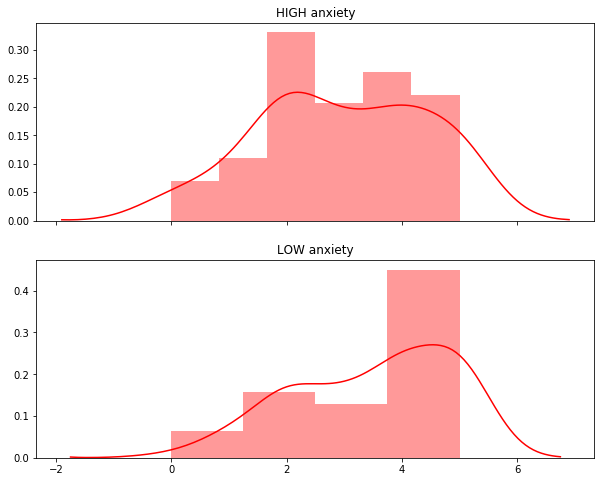

T TEST:
val ttest:2.53587088021368,pval:0.012107400689539447


In [17]:
f, axs = plt.subplots(2, 1, figsize=(10, 8),sharex=True)

ax0=sns.distplot(high_anx,kde=True,color="r", ax=axs[0])
ax0.set(title='HIGH anxiety',xlabel='')

ax0=sns.distplot(low_anx,kde=True,color="r", ax=axs[1])
ax0.set(title='LOW anxiety',xlabel='')

plt.show()

val,pval=tt(low_anx,high_anx)
print('T TEST:')
print('val ttest:{},pval:{}'.format(val,pval))

# Differences between low and high full OCI-R

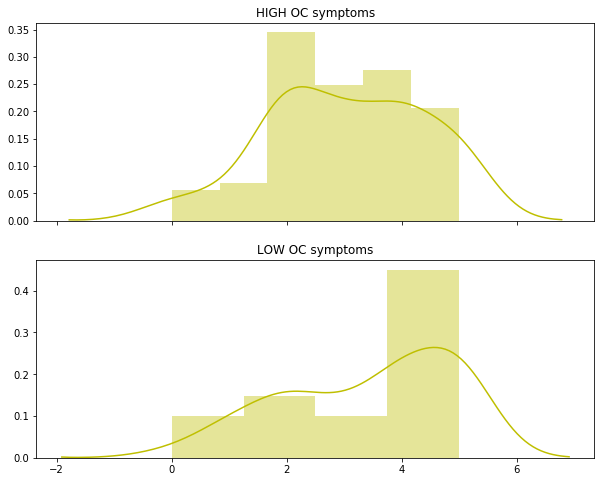

T TEST
val ttest:1.7638655974094337,pval:0.07952997467938992


In [24]:
f, axs = plt.subplots(2, 1, figsize=(10, 8),sharex=True)

ax0=sns.distplot(high_OCD,kde=True,color="y", ax=axs[0])
ax0.set(title='HIGH OC symptoms',xlabel='')

ax0=sns.distplot(low_OCD,kde=True,color="y", ax=axs[1])
ax0.set(title='LOW OC symptoms',xlabel='')

plt.show()
val,pval=tt(low_OCD,high_OCD)
print('T TEST')
print('val ttest:{},pval:{}'.format(val,pval))



# Difference between high and low OC without hoarding

"Traditionally, hoarding symptoms were coded under obsessive-compulsive disorder (OCD),
however, in DSM-5 hoarding symptoms are classified as a new independent diagnosis, hoarding
disorder (HD). This change will likely have a considerable impact on the self-report scales that
assess symptoms of OCD, as these scales often include items measuring symptoms of hoarding.
This study evaluated the psychometric properties of one of the most commonly used self-report
measures of OCD symptoms, the Obsessive-Compulsive Inventory-Revised (OCI-R), in a sample
of 474 individuals with either OCD (n = 118), HD (n = 201) or no current or past psychiatric
disorders (n = 155). Participants with HD were diagnosed according to the proposed DSM-5
criteria. For the purposes of this study the OCI-R was divided into two scales; the OCI-OCD
(measuring the 5 dimensions of OCD) and the OCI-HD (measuring the hoarding dimension).
Evidence of validity for the OCI-OCD and OCI-HD was obtained by comparing scores with the
Saving Inventory Revised (SI-R), the Hoarding Rating Scale (HRS) and the Beck Anxiety
Inventory (BAI). Receiver operating curves for both subscales indicated good sensitivity and
specificity for cut-scores determining diagnostic status. The results indicated that the OCI-OCD
and OCI-HD subscales are reliable and valid measures that adequately differentiate between
DSM-5 diagnostic groups. Implications for the future use of the OCI-R in OCD and HD samples
are discussed." - Wootten et al 2015

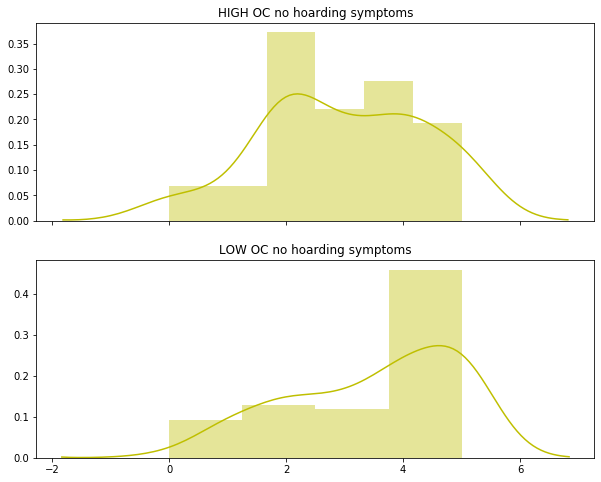

T TEST
val ttest:2.53587088021368,pval:0.012107400689539447


In [31]:
f, axs = plt.subplots(2, 1, figsize=(10, 8),sharex=True)

ax0=sns.distplot(high_OCD_no_hoarding,kde=True,color="y", ax=axs[0])
ax0.set(title='HIGH OC no hoarding symptoms',xlabel='')

ax0=sns.distplot(low_OCD_no_hoarding,kde=True,color="y", ax=axs[1])
ax0.set(title='LOW OC no hoarding symptoms',xlabel='')

plt.show()
val,pval=tt(low_OCD_no_hoarding,high_OCD_no_hoarding)
print('T TEST')
print('val ttest:{},pval:{}'.format(val,pval))



# No significant differences between low and high worry

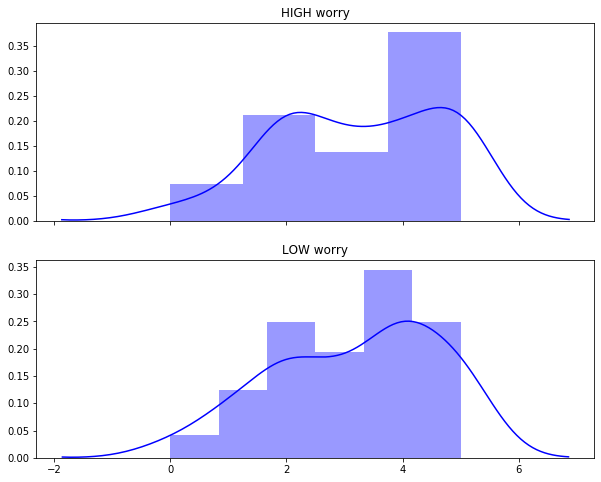

T TEST:
val ttest:-0.3709629098767314,pval:0.7111216562006064


In [15]:
f, axs = plt.subplots(2, 1, figsize=(10, 8),sharex=True)

ax0=sns.distplot(high_worry,kde=True,color="b", ax=axs[0])
ax0.set(title='HIGH worry',xlabel='')

ax0=sns.distplot(low_worry,kde=True,color="b", ax=axs[1])
ax0.set(title='LOW worry',xlabel='')

plt.show()

val,pval=tt(low_worry,high_worry)
print('T TEST:')
print('val ttest:{},pval:{}'.format(val,pval))

# Differences in depression

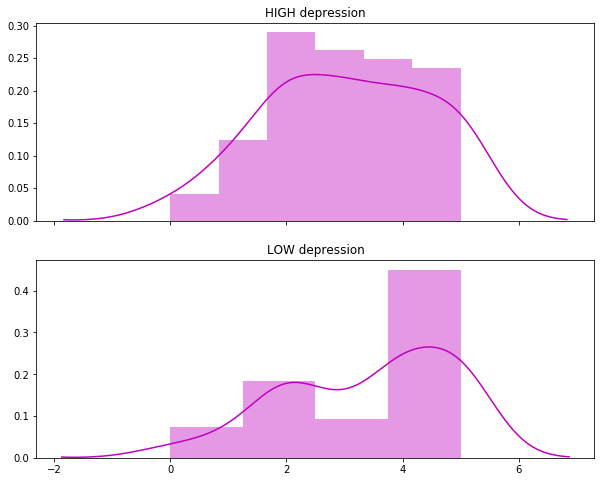

T TEST:
val ttest:1.655206015833023,pval:0.09970620268836256


In [30]:
f, axs = plt.subplots(2, 1, figsize=(10, 8),sharex=True)

ax0=sns.distplot(high_BDI,kde=True,color="m", ax=axs[0])
ax0.set(title='HIGH depression',xlabel='')

ax0=sns.distplot(low_BDI,kde=True,color="m", ax=axs[1])
ax0.set(title='LOW depression',xlabel='')

plt.show()

val,pval=tt(low_BDI,high_BDI)
print('T TEST:')
print('val ttest:{},pval:{}'.format(val,pval))

# Plotting results of EFA on self-report data

FA -1 factor loadings:
Red: BDI, Green: MASQ, Black: OCI-R, Magenta: Mania, Blue: PSWQ


No handles with labels found to put in legend.


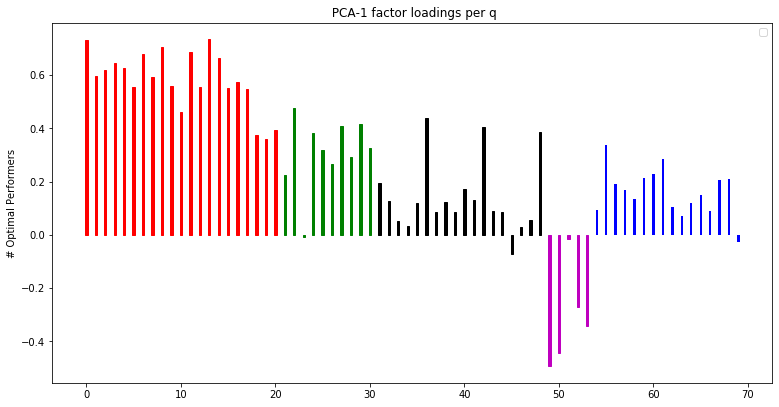

No handles with labels found to put in legend.


FA-2 Factor Loadings
Red: BDI, Green: MASQ, Black: OCI-R, Magenta: Mania, Blue: PSWQ


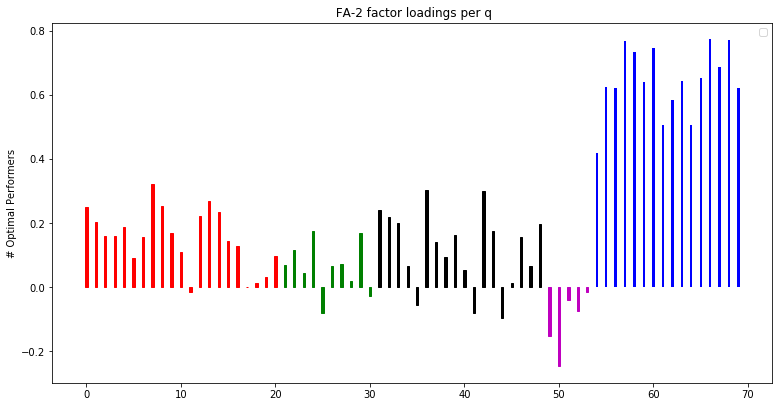

No handles with labels found to put in legend.


FA- 3 Factor Loadings
Red: BDI, Green: MASQ, Black: OCI-R, Magenta: Mania, Blue: PSWQ


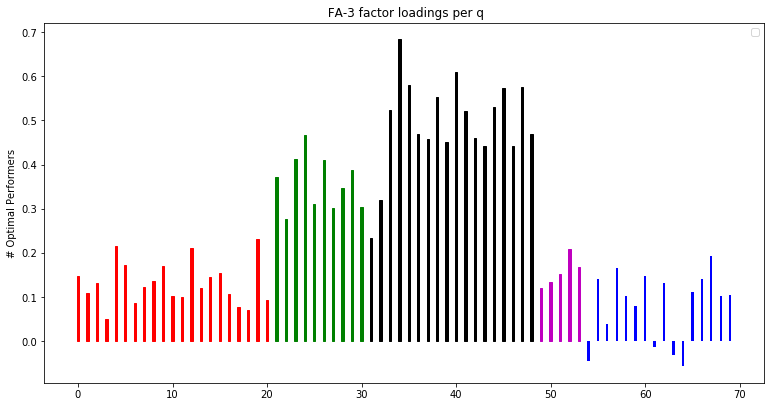

In [97]:
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

print('FA -1 factor loadings:')
print('Red: BDI, Green: MASQ, Black: OCI-R, Magenta: Mania, Blue: PSWQ')
# pca_df=pd.read_csv('factor_loadings_FA.csv',index_col=0)
fas=np.load('factor_loadings_EFA_varimax.npy')
pca1=fas[0]
column_titles=['bdi_1', 'bdi_2', 'bdi_3', 'bdi_4', 'bdi_5', 'bdi_6', 'bdi_7', 'bdi_8', 'bdi_9', 'bdi_10', 'bdi_11', 'bdi_12', 'bdi_13', 'bdi_14', 'bdi_15', 'bdi_16', 'bdi_17', 'bdi_18', 'bdi_19', 'bdi_20', 'bdi_21', 'masq_1', 'masq_2', 'masq_3', 'masq_4', 'masq_5', 'masq_6', 'masq_7', 'masq_8', 'masq_9', 'masq_10', 'ocd_1', 'ocd_2', 'ocd_3', 'ocd_4', 'ocd_5', 'ocd_6', 'ocd_7', 'ocd_8', 'ocd_9', 'ocd_10', 'ocd_11', 'ocd_12', 'ocd_13', 'ocd_14', 'ocd_15', 'ocd_16', 'ocd_17', 'ocd_18', 'Mania_1', 'Mania_2', 'Mania_3', 'Mania_4', 'Mania_5', 'pswq_1', 'pswq_2', 'pswq_3', 'pswq_4', 'pswq_5', 'pswq_6', 'pswq_7', 'pswq_8', 'pswq_9', 'pswq_10', 'pswq_11', 'pswq_12', 'pswq_13', 'pswq_14', 'pswq_15', 'pswq_16']
X = np.arange(70)
width=1.0
fig = plt.figure(figsize=[10,5])
ax = fig.add_axes([0,0,1,1])
handles, labels = ax.get_legend_handles_labels()
b=ax.bar(X, pca1,color = 'b', width = 0.25)
for i in range(21):
    b[i].set_color('r')
for i in range(21,31,1):
    b[i].set_color('g')
for i in range(31,49,1):
    b[i].set_color('k')
for i in range(49,54,1):
    b[i].set_color('m')
red_patch = mpatches.Patch(color='red', label='BDI')
plt.legend(handles=[red_patch])
plt.ylabel('# Optimal Performers')
plt.title(' PCA-1 factor loadings per q')
plt.legend(loc='best')

plt.show()


print('FA-2 Factor Loadings')
print('Red: BDI, Green: MASQ, Black: OCI-R, Magenta: Mania, Blue: PSWQ')
pca2=fas[1]
column_titles=['bdi_1', 'bdi_2', 'bdi_3', 'bdi_4', 'bdi_5', 'bdi_6', 'bdi_7', 'bdi_8', 'bdi_9', 'bdi_10', 'bdi_11', 'bdi_12', 'bdi_13', 'bdi_14', 'bdi_15', 'bdi_16', 'bdi_17', 'bdi_18', 'bdi_19', 'bdi_20', 'bdi_21', 'masq_1', 'masq_2', 'masq_3', 'masq_4', 'masq_5', 'masq_6', 'masq_7', 'masq_8', 'masq_9', 'masq_10', 'ocd_1', 'ocd_2', 'ocd_3', 'ocd_4', 'ocd_5', 'ocd_6', 'ocd_7', 'ocd_8', 'ocd_9', 'ocd_10', 'ocd_11', 'ocd_12', 'ocd_13', 'ocd_14', 'ocd_15', 'ocd_16', 'ocd_17', 'ocd_18', 'Mania_1', 'Mania_2', 'Mania_3', 'Mania_4', 'Mania_5', 'pswq_1', 'pswq_2', 'pswq_3', 'pswq_4', 'pswq_5', 'pswq_6', 'pswq_7', 'pswq_8', 'pswq_9', 'pswq_10', 'pswq_11', 'pswq_12', 'pswq_13', 'pswq_14', 'pswq_15', 'pswq_16']
X = np.arange(70)
width=1.0
fig = plt.figure(figsize=[10,5])
ax = fig.add_axes([0,0,1,1])
handles, labels = ax.get_legend_handles_labels()
b=ax.bar(X, pca2,color = 'b', width = 0.25)
for i in range(21):
    b[i].set_color('r')
for i in range(21,31,1):
    b[i].set_color('g')
for i in range(31,49,1):
    b[i].set_color('k')
for i in range(49,54,1):
    b[i].set_color('m')
red_patch = mpatches.Patch(color='red', label='BDI')
plt.legend(handles=[red_patch])
plt.ylabel('# Optimal Performers')
plt.title(' FA-2 factor loadings per q')
plt.legend(loc='best')

plt.show()

print('FA- 3 Factor Loadings')
print('Red: BDI, Green: MASQ, Black: OCI-R, Magenta: Mania, Blue: PSWQ')
pca3=fas[2]
column_titles=['bdi_1', 'bdi_2', 'bdi_3', 'bdi_4', 'bdi_5', 'bdi_6', 'bdi_7', 'bdi_8', 'bdi_9', 'bdi_10', 'bdi_11', 'bdi_12', 'bdi_13', 'bdi_14', 'bdi_15', 'bdi_16', 'bdi_17', 'bdi_18', 'bdi_19', 'bdi_20', 'bdi_21', 'masq_1', 'masq_2', 'masq_3', 'masq_4', 'masq_5', 'masq_6', 'masq_7', 'masq_8', 'masq_9', 'masq_10', 'ocd_1', 'ocd_2', 'ocd_3', 'ocd_4', 'ocd_5', 'ocd_6', 'ocd_7', 'ocd_8', 'ocd_9', 'ocd_10', 'ocd_11', 'ocd_12', 'ocd_13', 'ocd_14', 'ocd_15', 'ocd_16', 'ocd_17', 'ocd_18', 'Mania_1', 'Mania_2', 'Mania_3', 'Mania_4', 'Mania_5', 'pswq_1', 'pswq_2', 'pswq_3', 'pswq_4', 'pswq_5', 'pswq_6', 'pswq_7', 'pswq_8', 'pswq_9', 'pswq_10', 'pswq_11', 'pswq_12', 'pswq_13', 'pswq_14', 'pswq_15', 'pswq_16']
X = np.arange(70)
width=1.0
fig = plt.figure(figsize=[10,5])
ax = fig.add_axes([0,0,1,1])
handles, labels = ax.get_legend_handles_labels()
b=ax.bar(X, pca3,color = 'b', width = 0.25)
for i in range(21):
    b[i].set_color('r')
for i in range(21,31,1):
    b[i].set_color('g')
for i in range(31,49,1):
    b[i].set_color('k')
for i in range(49,54,1):
    b[i].set_color('m')
red_patch = mpatches.Patch(color='red', label='BDI')
plt.legend(handles=[red_patch])
plt.ylabel('# Optimal Performers')
plt.title(' FA-3 factor loadings per q')
plt.legend(loc='best')

plt.show()

# Bayesian model: 

#### For model below, i=condition, j=subject, g=group

$\text{data}_{i,j} \sim \text{Bernoulli}(\theta_{i,j})$

$\theta_{i,j}= \text{logistic}(\text{baseline}+\text{subjectEffect}_{j}+\text{ConditionEffect}_{i}+\text{Psychopathology}_{g}+\text{Interaction(Cond x Psychopathology)}_{i,g})$

$\text{subjectEffect}_{j} \sim \mathcal{N}(0,\sigma_{subject})$

$\text{ConditionEffect}_{i} \sim \mathcal{N}(0,\sigma_{condition})$

$\text{Psychopathology}_{g} \sim \mathcal{N}(0,\sigma_{anxiety})$

$\text{Interaction(Cond x Psychopathology)}_{i,g} \sim \mathcal{N}(0,\sigma_{interaction})$

$\sigma_{all} \sim U(0,5)$

Convert all to sum-to-zero

# Model-fitting results

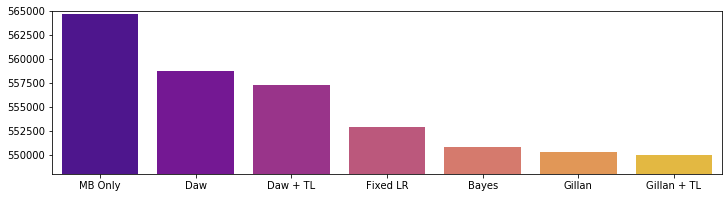

In [36]:
plt.figure(figsize=(12,3))
models=['MB Only','Daw','Daw + TL','Fixed LR','Bayes','Gillan','Gillan + TL']
BIC=[564698.33,558749.66,557273.99,552925.479,550830.48,550260.30,549967.84]
ax = sns.barplot(x=models, y=BIC,
                 palette="plasma")
plt.ylim(548000,565000)
plt.show()
